# Continuous time Markov processes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gillespie 
Implement a flexible base for the Gillespie algorithm so that the following models can be simulated
by some simple tweaking.

In [2]:
def gillespie_step(C, T, K, steps):
    
    ###### Inputs ######
    # C = array containing void arrays of the population (ex.: C = (X1, X2, ..))
    # T = array to store times
    # K = array containing the rate constants
    # steps = number of reactions per trajectory

    ###### Initialize populations ######
    n = C.shape[0]  
    #for i in range(n): C[i][0] = np.random.uniform(0, 500) 
    C[0,0] = 500
    C[1,0] = 76
    # store the choosen reaction
    R = np.zeros(steps+1)
    
    ###### Main Code Loop ######
    for i in range(steps):

        # Compute updated overall reaction rate
        w = compute_w(C, K, i)
        lambda_c = sum(w)

        # Calculate time to next reaction
        tau = np.random.exponential(lambda_c, 1)
        T[i+1] = T[i] + tau[0]

        # Select which reaction to occur
        r = np.random.uniform(0,1)
        p = np.cumsum(w) / lambda_c
        if i%500 == 0 : print(p)
            
        reaction_index = np.searchsorted(p, r)
        diff_x, diff_y = reaction(reaction_index)
        C[0, i+1] = C[0, i] + diff_x
        C[1, i+1] = C[1, i] + diff_y
        
        # Store the reaction
        R[i] = reaction_index
        
    return (C, T, R)

## Lotka-Volterra

Run some simulations of the Lotka-Volterra model with the Gillespie algorithm and the
parameters k1 = 3, k2 = 1/100, k3 = 5 $s^{-1}$. Start from different initial conditions, either close or
far from $C^∗$.<br>
Do the predators become extinct in some cases? What happens to the prey in that case?
Which variation in the parameters can induce or reduce the chance of this extinction?

In [3]:
###### Fix model parameters ######
K = np.array([3, 0.01, 5])
#K = np.array([0.5, 0.01, 0.1])
steps = 50000    # Number of reactions per trajectory

# Set up holder arrays
T = np.zeros(steps+1)
X = np.zeros(steps+1) #prey
Y = np.zeros(steps+1) #predator
C = np.array([X,Y])

def reaction(reaction_index):
    if reaction_index == 0:
        diff_x = + 1
        diff_y = 0
    elif reaction_index == 1:
        diff_x = - 1
        diff_y = + 1
    else:
        diff_x = 0
        diff_y = -1
    return (diff_x, diff_y)

def compute_w(C, K, i):
    w = np.array([K[0]*C[0,i],  K[1]*C[0,i]*C[1,i], K[2]*C[1,i]])
    return w

/tmp/ipykernel_78584/2542849540.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  T[i+1] = T[i] + tau


[0.66371681 0.83185841 1.        ]
[0.62182592 0.84775601 1.        ]
[0.55035445 0.83837327 1.        ]
[0.4683077  0.82109949 1.        ]
[0.39401784 0.802483   1.        ]
[0.3195595 0.7712036 1.       ]
[0.26035399 0.72985902 1.        ]
[0.23014105 0.69809453 1.        ]
[0.19726859 0.65098634 1.        ]
[0.17905253 0.60340702 1.        ]
[0.1616244  0.54036426 1.        ]
[0.15717014 0.48356014 1.        ]
[0.17064846 0.44709898 1.        ]
[0.1904683  0.40823706 1.        ]
[0.34713125 0.54152476 1.        ]
[0.66194036 0.81198018 1.        ]
[0.71252781 0.8764092  1.        ]
[0.64951972 0.87685162 1.        ]
[0.51899674 0.8442347  1.        ]
[0.41273744 0.81309276 1.        ]
[0.33235278 0.78546041 1.        ]
[0.26447764 0.74759013 1.        ]
[0.21661986 0.70834693 1.        ]
[0.20018831 0.67930566 1.        ]
[0.17518955 0.62542668 1.        ]
[0.15350509 0.55773516 1.        ]
[0.15036324 0.50371684 1.        ]
[0.14104882 0.43490054 1.        ]
[0.16851489 0.4201638  

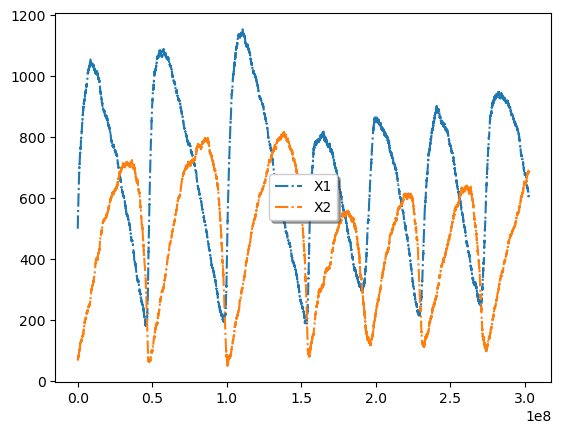

In [100]:
C, T, R = gillespie_step(C, T, K, steps)

# plot of simulation
fig, ax = plt.subplots()
ax.plot(T, C[0], '-.', label='X1')
ax.plot(T, C[1], '-.', label='X2')
legend = ax.legend(loc='center', shadow=True)
plt.show()

array([0., 2., 0., ..., 2., 1., 0.])

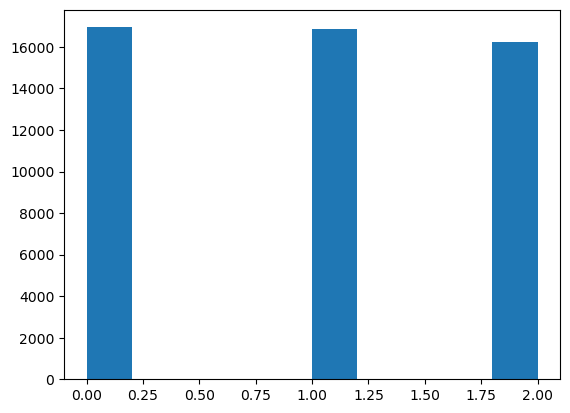

In [101]:
plt.hist(R)
R

## Brusselator
Run some simulations of the Brussellator model with the Gillespie algorithm, using $a = 2, b = 5$
and for different volume sizes: $\Omega = 102, 103, 104$. What can one note by varying $\Omega$?

In [4]:
def gillespie_step(C, T, K, steps):
    
    ###### Inputs ######
    # C = array containing void arrays of the population (ex.: C = (X1, X2, ..))
    # T = array to store times
    # K = array containing the rate constants
    # steps = number of reactions per trajectory

    ###### Initialize populations ######
    n = C.shape[0]  
    #for i in range(n): C[i][0] = np.random.uniform(0, 500) 
    C[0,0] = 500
    C[1,0] = 76
    # store the choosen reaction
    R = np.zeros(steps+1)
    
    ###### Main Code Loop ######
    for i in range(steps):

        # Compute updated overall reaction rate
        w = compute_w(C, a, b, V, i)
        lambda_c = sum(w)

        # Calculate time to next reaction
        tau = np.random.exponential(lambda_c, 1)
        T[i+1] = T[i] + tau[0]

        # Select which reaction to occur
        r = np.random.uniform(0,1)
        p = np.cumsum(w) / lambda_c
            
        reaction_index = np.searchsorted(p, r)
        diff_x, diff_y = reaction(reaction_index)
        C[0, i+1] = C[0, i] + diff_x
        C[1, i+1] = C[1, i] + diff_y
        
        # Store the reaction
        R[i] = reaction_index
        
    return (C, T, R)

In [150]:
###### Fix model parameters ######
a = 2
b = 5
V = 1e2
steps = 10000000    # Number of reactions per trajectory

# Set up holder arrays
T = np.zeros(steps+1)
X = np.zeros(steps+1) #prey
Y = np.zeros(steps+1) #predator
C = np.array([X,Y])

def reaction(reaction_index):
    if reaction_index == 0:
        diff_x = + 1
        diff_y = 0
    elif reaction_index == 1:
        diff_x = - 1
        diff_y = 0
    elif reaction_index == 2:
        diff_x = + 1
        diff_y = - 1
    else:
        diff_x = - 1
        diff_y = + 1
    return (diff_x, diff_y)

def compute_w(C, a, b, V, i):
    w = np.array([a*V, C[0,i], C[0,i]*C[1,i]*(C[0,i]-1)/V**2, b*C[0,i]])
    return w

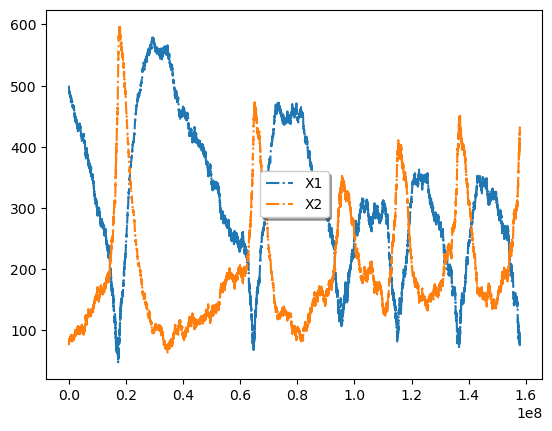

In [113]:
C, T, R = gillespie_step(C, T, K, steps)

# plot of simulation
fig, ax = plt.subplots()
ax.plot(T, C[0], '-.', label='X1')
ax.plot(T, C[1], '-.', label='X2')
legend = ax.legend(loc='center', shadow=True)
plt.show()

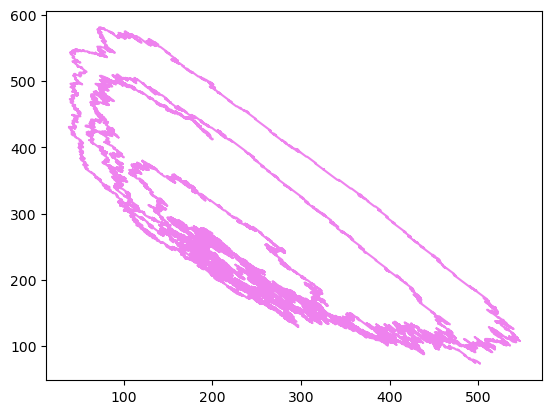

In [134]:
V = 1e2
C, T, R = gillespie_step(C, T, K, steps)

# plot of simulation
plt.plot(C[0], C[1], linestyle='-', markersize=0.2, color = 'violet')

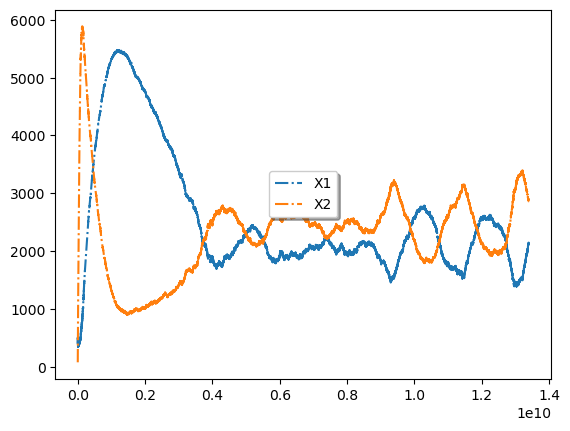

In [143]:
V = 1e3
C, T, R = gillespie_step(C, T, K, steps)

# plot of simulation
fig, ax = plt.subplots()
ax.plot(T, C[0], '-.', label='X1')
ax.plot(T, C[1], '-.', label='X2')
legend = ax.legend(loc='center', shadow=True)
plt.show()

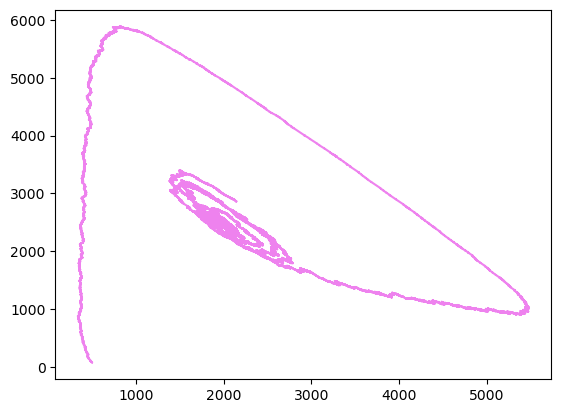

In [144]:
plt.plot(C[0], C[1], linestyle='-', markersize=0.2, color = 'violet')

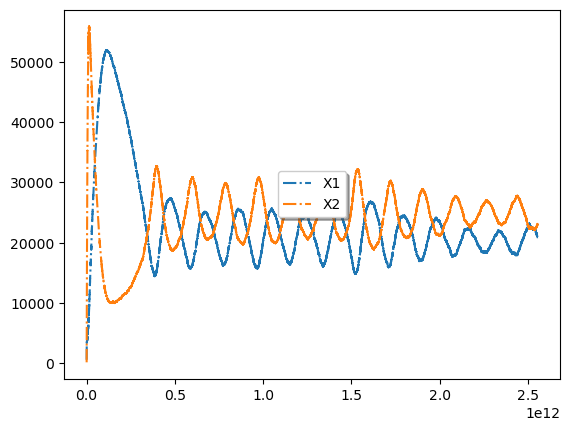

In [151]:
V = 1e4
C, T, R = gillespie_step(C, T, K, steps)

# plot of simulation
fig, ax = plt.subplots()
ax.plot(T, C[0], '-.', label='X1')
ax.plot(T, C[1], '-.', label='X2')
legend = ax.legend(loc='center', shadow=True)
plt.show()

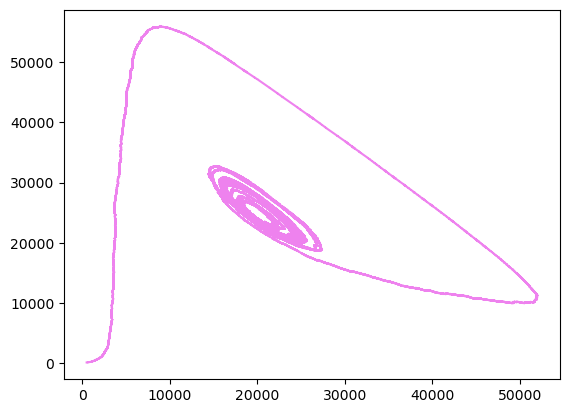

In [152]:
plt.plot(C[0], C[1], linestyle='-', markersize=0.2, color = 'violet')